In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from __future__ import division

In [2]:
capital_base = 100000
r_p = 0.05 # Aggregate performance of assets in the portfolio
r_no_lvg = capital_base * r_p
print(f'Portfolio returns without leverage: {r_no_lvg}')

Portfolio returns without leverage: 5000.0


In [4]:
debt = 100000

r_lvg = (capital_base + debt) * r_p
r_lvg_pct = r_lvg / capital_base
# Returns are calculated over the initial capital base
# Think of the debt as an asset purchased and added to the portfolio
lvg_ratio = (debt + capital_base) / capital_base
print(f"Portfolio returns with leverage: {r_lvg}")
print(f"Percentage returns with {lvg_ratio} x leverage: {r_lvg_pct}")

Portfolio returns with leverage: 10000.0
Percentage returns with 2.0 x leverage: 0.1


In [ ]:
capital_base = 100000
debt = 50000
i = 0.02
r_p = 0.05

int_pmt = i * debt
r_lvg = (capital_base + debt) * r_p
r_total = r_lvg - int_pmt
r_pct_lvg = r_total / capital_base
lvg_ratio = (capital_base + debt) / capital_base
print(f'Portfolio returns with leverage and interest: {r_total}')
print(f"Percentage returns with {lvg_ratio} x leverage and {i*100} % interest: {r_pct_lvg}")

Portfolio returns with leverage and interest: 6500.0
Percentage returns with 1.5 x leverage and 2.0% interest: 0.065


In [ ]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 로드 (2015년)
long_data = fdr.DataReader('QQQ', '2015-01-01', '2015-12-31')['Adj Close']
short_data = fdr.DataReader('TLT', '2015-01-01', '2015-12-31')['Adj Close']

# 2. 초기 설정
initial_equity = 100000.0
leverage_target = 2.0
current_equity = initial_equity

# 결과를 담을 리스트
history = []

# 월별 첫 거래일 추출
monthly_first_days = long_data.groupby(long_data.index.to_period('M')).apply(lambda x: x.index[0])

# 3. 시뮬레이션 루프
for date in long_data.index:
    # 매달 첫 거래일이면 리밸런싱 수행
    if date in monthly_first_days.values:
        # 현재 자본금을 기준으로 목표 노출액 재계산
        long_exposure = current_equity * (leverage_target / 2)
        short_exposure = current_equity * (leverage_target / 2)
        
        # 새로운 보유 수량 결정
        long_shares = long_exposure / long_data.loc[date]
        short_shares = short_exposure / short_data.loc[date]
        
        # 리밸런싱 시점의 기준 가격 저장 (수익률 계산용)
        rebalance_long_price = long_data.loc[date]
        rebalance_short_price = short_data.loc[date]
        rebalance_equity = current_equity

    # 매일의 가치 변화 계산
    current_long_val = long_shares * long_data.loc[date]
    current_short_val = short_shares * short_data.loc[date]
    
    # 롱/숏 손익 반영 (Short은 가격 상승 시 손실)
    long_pnl = current_long_val - (long_shares * rebalance_long_price)
    short_pnl = (short_shares * rebalance_short_price) - current_short_val
    
    current_equity = rebalance_equity + long_pnl + short_pnl
    
    # 총 자산 노출액 및 레버리지 비율 계산
    gross_exposure = current_long_val + current_short_val
    leverage_ratio = gross_exposure / current_equity
    
    history.append({
        'Date': date,
        'Leverage_Ratio': leverage_ratio,
        'Equity': current_equity
    })

# 4. 데이터프레임 변환 및 시각화
results = pd.DataFrame(history).set_index('Date')

C:\Users\USER\AppData\Local\Temp\ipykernel_11948\939447680.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend();


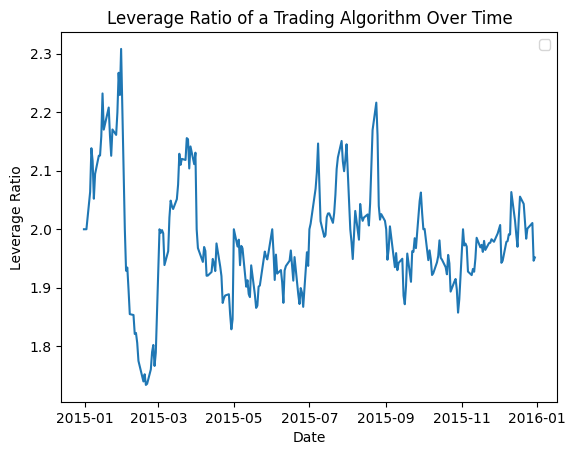

In [11]:
plt.plot(results['Leverage_Ratio']);
plt.title("Leverage Ratio of a Trading Algorithm Over Time")
plt.xlabel('Date');
plt.ylabel('Leverage Ratio');
plt.legend();

C:\Users\USER\AppData\Local\Temp\ipykernel_11948\4127555970.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend();


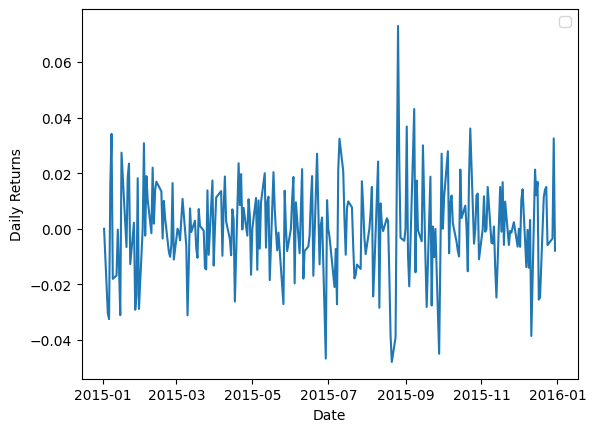

In [12]:
# 위에서 계산한 results 데이터프레임의 Equity를 활용해 일일 수익률 계산
results['Daily_Returns'] = results['Equity'].pct_change()
plt.plot(results['Daily_Returns']);
plt.xlabel('Date');
plt.ylabel('Daily Returns');
plt.legend();

In [ ]:
print(f"Mean return: {results['Daily_Returns'].mean()}") # 0.0004265322159130133
print(f"Volatility: {results['Daily_Returns'].std()}") # 0.016692740226312647

Mean return: 0.0004265322159130133
Volatility: 0.016692740226312647


# Example

In [14]:
# Note these are all expected returns. You need to validate that
# your strategy will continue to produce these returns and volatility using other methods.
# Just measuring historically is a very poor predictor of future performance.
# We'll for now assume you've already validated that you can expect to keep seeing numbers similar to these.

strat_A_ann_return = 0.22
strat_A_ann_vol = 0.15

strat_B_ann_return = 0.05
strat_B_ann_vol = 0.02

# We'll assume a risk free rate of 0.02
risk_free_rate = 0.02

print('Strategy A Sharpe: %s' % ((strat_A_ann_return - risk_free_rate) / strat_A_ann_vol))
print('Strategy B Sharpe: %s' % ((strat_B_ann_return - risk_free_rate) / strat_B_ann_vol))

# Add in leverage to B

leverage = 3
# Expressed in returns

print('Strategy B Sharpe: %s' % (
    (strat_B_ann_return * leverage - risk_free_rate * leverage) / (strat_B_ann_vol * leverage)
))
print('Strategy B Levered Annual Returns: %s' % (
    (strat_B_ann_return * leverage - risk_free_rate * leverage)
))

Strategy A Sharpe: 1.3333333333333335
Strategy B Sharpe: 1.5
Strategy B Sharpe: 1.5000000000000004
Strategy B Levered Annual Returns: 0.09000000000000002
